#Setup

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import torch.nn.functional as F
import matplotlib.pyplot as plt  # For visualizations
import numpy as np
import torchvision

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


#Load Data

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
mnist_trainloader = torch.utils.data.DataLoader(mnist_trainset, batch_size=64, shuffle=True)

mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
mnist_testloader = torch.utils.data.DataLoader(mnist_testset, batch_size=64, shuffle=False)

fashion_trainset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
fashion_trainloader = torch.utils.data.DataLoader(fashion_trainset, batch_size=64, shuffle=True)

fashion_testset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
fashion_testloader = torch.utils.data.DataLoader(fashion_testset, batch_size=64, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 58.6MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 2.01MB/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 15.1MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 2.20MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 26.4M/26.4M [00:01<00:00, 18.9MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 302kB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 5.45MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 18.6MB/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



#Visualize MNIST Samples

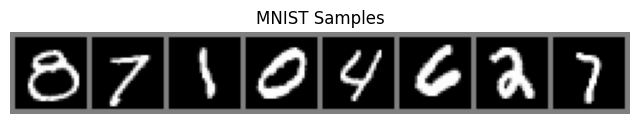

Labels: 8 7 1 0 4 6 2 7


In [3]:
dataiter = iter(mnist_trainloader)
images, labels = next(dataiter)

def imshow(img, title):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.figure(figsize=(8,2))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(title)
    plt.axis('off')
    plt.show()

classes_mnist = [str(i) for i in range(10)]
imshow(torchvision.utils.make_grid(images[:8]), title='MNIST Samples')
print('Labels:', ' '.join(f'{classes_mnist[labels[j]]}' for j in range(8)))

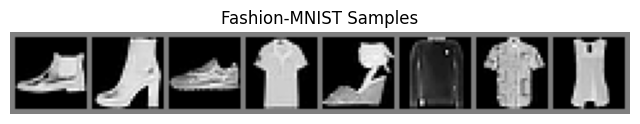

Labels: Ankle Boot Ankle Boot Sneaker T-shirt/top Sandal Pullover Shirt T-shirt/top


In [4]:
dataiter = iter(fashion_trainloader)
images, labels = next(dataiter)

classes_fashion = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']
imshow(torchvision.utils.make_grid(images[:8]), title='Fashion-MNIST Samples')
print('Labels:', ' '.join(f'{classes_fashion[labels[j]]}' for j in range(8)))

#Define the Neural Network

In [5]:
class SimpleANN(nn.Module):
    def __init__(self, input_size=784, hidden_size=128, output_size=10):
        super(SimpleANN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)  # Input layer to hidden layer
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)  # Hidden layer to output layer

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the image
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

#Train the Model

Epoch 1/5, Loss: 0.7469
Epoch 2/5, Loss: 0.3676
Epoch 3/5, Loss: 0.3234
Epoch 4/5, Loss: 0.2983
Epoch 5/5, Loss: 0.2783


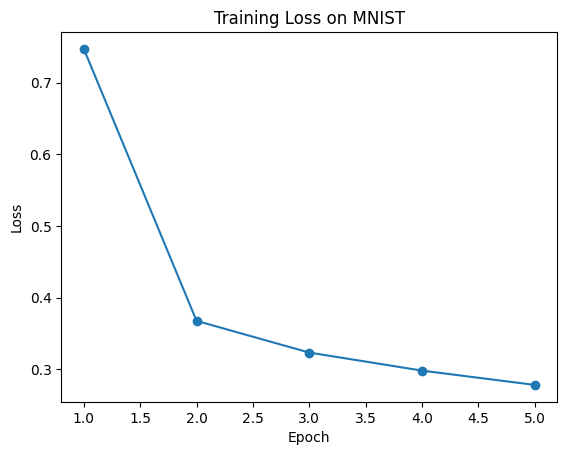

In [6]:
model = SimpleANN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

epochs = 5
mnist_train_losses = []
for epoch in range(epochs):
    running_loss = 0.0
    for images, labels in mnist_trainloader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    avg_loss = running_loss/len(mnist_trainloader)
    mnist_train_losses.append(avg_loss)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}")

plt.plot(range(1, epochs+1), mnist_train_losses, marker='o')
plt.title('Training Loss on MNIST')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

#Evaluate the Model

In [7]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in mnist_testloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
mnist_accuracy = 100 * correct / total
print(f"Accuracy on MNIST test images: {mnist_accuracy:.2f}%")

torch.save(model.state_dict(), 'mnist_model.pth')

Accuracy on MNIST test images: 92.30%


#Implement LoRA

In [8]:
model = SimpleANN().to(device)
model.load_state_dict(torch.load('mnist_model.pth'))

class LoRAFc(nn.Module):
    def __init__(self, layer, rank, device):
        super(LoRAFc, self).__init__()
        self.layer = layer
        self.rank = rank
        self.lora_A = nn.Parameter(torch.randn(self.layer.out_features, rank, device=device) * 0.01)
        self.lora_B = nn.Parameter(torch.randn(rank, self.layer.in_features, device=device) * 0.01)
        self.layer.to(device)
        for param in self.layer.parameters():
            param.requires_grad = False  # Freeze original weights

    def forward(self, x):
        original_output = self.layer(x)
        lora_output = torch.matmul(x, self.lora_B.t())
        lora_output = torch.matmul(lora_output, self.lora_A.t())
        return original_output + lora_output

def apply_lora(model, rank, device):
    model.fc1 = LoRAFc(model.fc1, rank, device)

rank = 10
apply_lora(model, rank, device)

trainable_params_lora = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Number of parameters being trained in LoRA fine-tuning: {trainable_params_lora}")

Number of parameters being trained in LoRA fine-tuning: 10410


<ipython-input-8-1b299e3da571>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('mnist_model.pth'))


#Fine-tune LoRA Model

LoRA Epoch 1/5, Loss: 1.3384
LoRA Epoch 2/5, Loss: 0.6766
LoRA Epoch 3/5, Loss: 0.5941
LoRA Epoch 4/5, Loss: 0.5438
LoRA Epoch 5/5, Loss: 0.5096


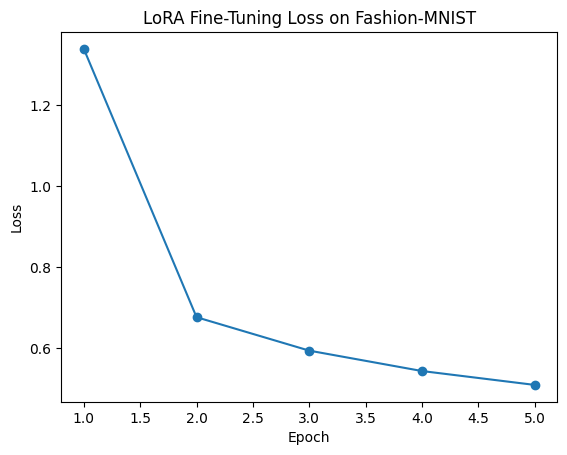

In [9]:
optimizer_lora = optim.SGD(filter(lambda p: p.requires_grad, model.parameters()), lr=0.01)
epochs_lora = 5
lora_losses = []
for epoch in range(epochs_lora):
    running_loss = 0.0
    for images, labels in fashion_trainloader:
        images, labels = images.to(device), labels.to(device)
        optimizer_lora.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_lora.step()
        running_loss += loss.item()
    avg_loss = running_loss/len(fashion_trainloader)
    lora_losses.append(avg_loss)
    print(f"LoRA Epoch {epoch+1}/{epochs_lora}, Loss: {avg_loss:.4f}")

plt.plot(range(1, epochs_lora+1), lora_losses, marker='o')
plt.title('LoRA Fine-Tuning Loss on Fashion-MNIST')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

#Evaluate LoRA

In [10]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in fashion_testloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
fashion_accuracy = 100 * correct / total
print(f"LoRA fine-tuned model accuracy on Fashion-MNIST test images: {fashion_accuracy:.2f}%")

LoRA fine-tuned model accuracy on Fashion-MNIST test images: 80.90%


#Full Fine-Tuning for Comparison

<ipython-input-11-966229e89868>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_full_ft.load_state_dict(torch.load('mnist_model.pth'))


Number of parameters being trained in full fine-tuning: 101770
Full FT Epoch 1/5, Loss: 0.7797
Full FT Epoch 2/5, Loss: 0.5142
Full FT Epoch 3/5, Loss: 0.4631
Full FT Epoch 4/5, Loss: 0.4350
Full FT Epoch 5/5, Loss: 0.4156


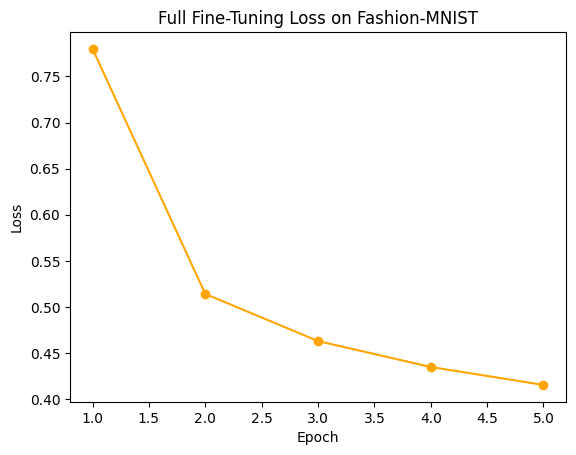

In [11]:
model_full_ft = SimpleANN().to(device)
model_full_ft.load_state_dict(torch.load('mnist_model.pth'))

optimizer_full_ft = optim.SGD(model_full_ft.parameters(), lr=0.01)

trainable_params_full = sum(p.numel() for p in model_full_ft.parameters() if p.requires_grad)
print(f"Number of parameters being trained in full fine-tuning: {trainable_params_full}")


epochs_full_ft = 5
full_ft_losses = []
for epoch in range(epochs_full_ft):
    running_loss = 0.0
    for images, labels in fashion_trainloader:
        images, labels = images.to(device), labels.to(device)
        optimizer_full_ft.zero_grad()
        outputs = model_full_ft(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_full_ft.step()
        running_loss += loss.item()
    avg_loss = running_loss/len(fashion_trainloader)
    full_ft_losses.append(avg_loss)
    print(f"Full FT Epoch {epoch+1}/{epochs_full_ft}, Loss: {avg_loss:.4f}")

plt.plot(range(1, epochs_full_ft+1), full_ft_losses, marker='o', color='orange')
plt.title('Full Fine-Tuning Loss on Fashion-MNIST')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

#Evaluate the Fully Fine-Tuned Model

In [12]:
model_full_ft.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in fashion_testloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model_full_ft(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
fashion_accuracy_full_ft = 100 * correct / total
print(f"Fully fine-tuned model accuracy on Fashion-MNIST test images: {fashion_accuracy_full_ft:.2f}%")

Fully fine-tuned model accuracy on Fashion-MNIST test images: 83.85%


#Comparison

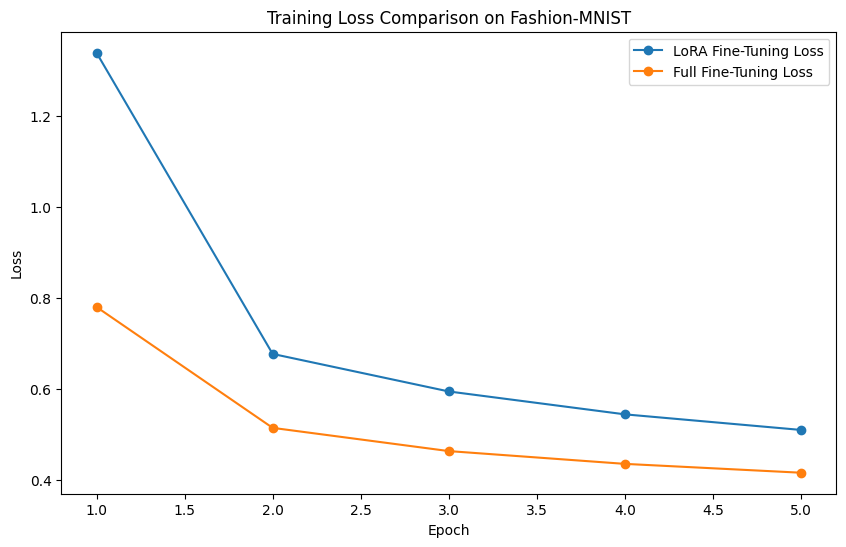

In [13]:
plt.figure(figsize=(10,6))
plt.plot(range(1, epochs_lora+1), lora_losses, marker='o', label='LoRA Fine-Tuning Loss')
plt.plot(range(1, epochs_full_ft+1), full_ft_losses, marker='o', label='Full Fine-Tuning Loss')
plt.title('Training Loss Comparison on Fashion-MNIST')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

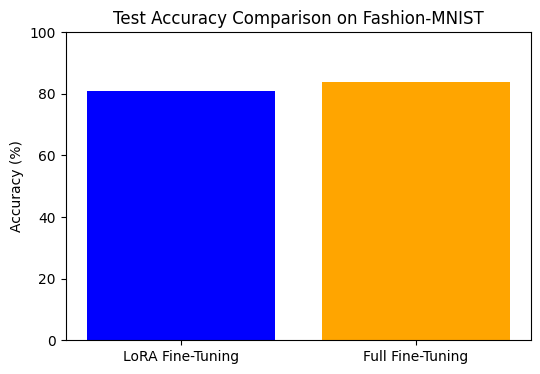

In [14]:
lora_accuracy = fashion_accuracy
full_ft_accuracy = fashion_accuracy_full_ft

plt.figure(figsize=(6,4))
methods = ['LoRA Fine-Tuning', 'Full Fine-Tuning']
accuracies = [lora_accuracy, full_ft_accuracy]
plt.bar(methods, accuracies, color=['blue', 'orange'])
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy Comparison on Fashion-MNIST')
plt.ylim(0, 100)
plt.show()